## Kmeans

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [2]:
topics = pd.read_csv("topics.csv")
topics=topics.iloc[:,1:11]
topics

,0,1,2,3,4,5,6,7,8,9
0,lawyer,accident,get,insurance,truck,injury,know,well,law,time
1,school,say,student,district,teacher,covid,mask,union,announce,class
2,say,police,year,officer,man,shoot,old,charge,news,report
3,game,bull,team,point,season,first,play,win,second,get
4,roof,roofing,also,well,repair,cover,make,need,get,company
5,service,work,community,business,include,experience,company,provide,year,program
6,say,go,get,see,time,make,show,season,year,know
7,say,russian,ukrainian,year,country,also,company,use,energy,people
8,share,company,stock,quarter,rating,work,tool,price,own,buy
9,document,social,_,important,ad,color,text,margin,icon,function


In [3]:
words = []
for index,row in topics.iterrows():
    words = words + [a for a in row]
    #print([a for a in row])
len(words)

210

In [4]:
words = set(words)
len(words)

158

In [5]:
words.remove("_")
words.remove("d")

In [3]:
df = pd.read_pickle("data_with_topics.pkl")

In [7]:
df

,index,date,language,title,text,text_clean,cluster,fist_topic,second_topic,third_topic
0,0,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...,0,"(1, 0.99801016)",None,None
1,1,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...,0,"(1, 0.9981448)",None,None
2,2,2022-01-06,english,Watch ‘Chicago P.D.’ Preview Wednesday,Chicago PD 9×11 “Lies” Season 9 Episode 11 Pro...,chicago pd lies season episode pro...,0,"(6, 0.68915355)","(0, 0.21457739)","(17, 0.06135006)"
3,3,2022-01-06,english,Trump’s Solution for Chicago Public Schools? K...,Wise of Foolish?\nThe Chicago Tribune article ...,wise of foolish the chicago tribune article t...,0,"(12, 0.45712763)","(1, 0.32274714)","(6, 0.07527004)"
4,4,2022-01-06,english,"Family, friends, colleagues gathering today at...",The neighbors near Mashawn Plummer’s Portage P...,the neighbors near mashawn plummer s portage p...,0,"(6, 0.56970793)","(2, 0.33617198)","(3, 0.0802123)"
...,...,...,...,...,...,...,...,...,...,...
181866,200114,2022-03-05,english,Chicago girl shot after celebrating 12th birth...,Authorities say a girl who was shot in the hea...,authorities say a girl who was shot in the hea...,0,"(2, 0.8981696)","(0, 0.013380353)","(1, 0.010981139)"
181867,200115,2022-03-05,english,Loyola Chicago vs. Northern Iowa – MVC Tournam...,"The No. 4 seed Loyola Chicago Ramblers (23-7, ...",the no seed loyola chicago ramblers ...,0,"(15, 0.6627376)","(3, 0.17722566)","(14, 0.08331981)"
181868,200116,2022-03-05,english,"DraftKings Illinois Promo Code: $1,050 Bonus a...",Remember to check out the DraftKings Illinois ...,remember to check out the draftkings illinois ...,0,"(10, 0.4513439)","(16, 0.3355821)","(13, 0.1768964)"
181869,200117,2022-03-05,english,"Sidney, Illinois had a median home valuation o...",[BlockShopper.com] .\n|Buyer||Address||Valuati...,buyer address valuation jennifer a ...,0,"(11, 0.9248376)","(18, 0.033204958)","(12, 0.028403208)"


In [36]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    stop_words = 'english',
    vocabulary = words
)

text = tfidf.fit_transform(df.text_clean)

Fit 5 clusters
Fit 7 clusters
Fit 9 clusters
Fit 11 clusters
Fit 13 clusters
Fit 15 clusters
Fit 17 clusters
Fit 19 clusters
Fit 21 clusters
Fit 23 clusters
Fit 25 clusters
Fit 27 clusters
Fit 29 clusters


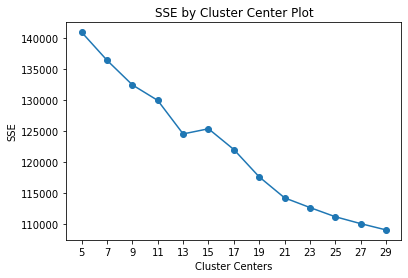

In [9]:
def find_optimal_clusters(data, max_k):
    iters = range(5, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 30)

In [11]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=3000, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
#plot_tsne_pca(text, clusters)

In [37]:
clusters_all = KMeans(n_clusters=15, random_state=20).fit_predict(text)

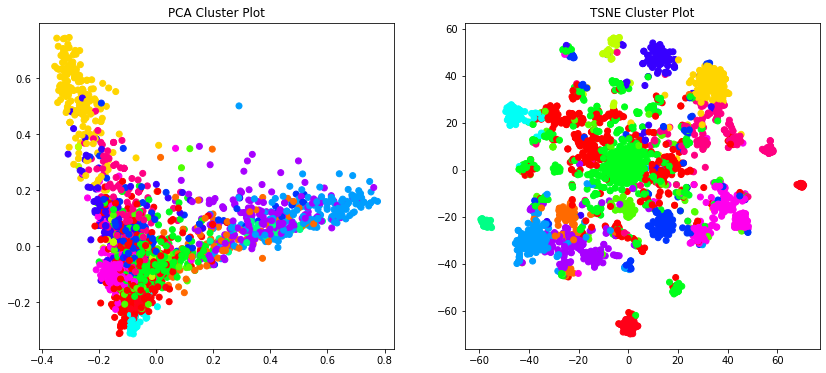

In [13]:
plot_tsne_pca(text, clusters_all)

In [48]:
df["Topic_cluster"] = clusters_all

In [49]:
df

,index,date,language,title,text,text_clean,cluster,fist_topic,second_topic,third_topic,Topic_cluster
0,0,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...,0,"(1, 0.99801016)",None,None,7
1,1,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...,0,"(1, 0.9981448)",None,None,7
2,2,2022-01-06,english,Watch ‘Chicago P.D.’ Preview Wednesday,Chicago PD 9×11 “Lies” Season 9 Episode 11 Pro...,chicago pd lies season episode pro...,0,"(6, 0.68915355)","(0, 0.21457739)","(17, 0.06135006)",0
3,3,2022-01-06,english,Trump’s Solution for Chicago Public Schools? K...,Wise of Foolish?\nThe Chicago Tribune article ...,wise of foolish the chicago tribune article t...,0,"(12, 0.45712763)","(1, 0.32274714)","(6, 0.07527004)",1
4,4,2022-01-06,english,"Family, friends, colleagues gathering today at...",The neighbors near Mashawn Plummer’s Portage P...,the neighbors near mashawn plummer s portage p...,0,"(6, 0.56970793)","(2, 0.33617198)","(3, 0.0802123)",0
...,...,...,...,...,...,...,...,...,...,...,...
181866,200114,2022-03-05,english,Chicago girl shot after celebrating 12th birth...,Authorities say a girl who was shot in the hea...,authorities say a girl who was shot in the hea...,0,"(2, 0.8981696)","(0, 0.013380353)","(1, 0.010981139)",0
181867,200115,2022-03-05,english,Loyola Chicago vs. Northern Iowa – MVC Tournam...,"The No. 4 seed Loyola Chicago Ramblers (23-7, ...",the no seed loyola chicago ramblers ...,0,"(15, 0.6627376)","(3, 0.17722566)","(14, 0.08331981)",11
181868,200116,2022-03-05,english,"DraftKings Illinois Promo Code: $1,050 Bonus a...",Remember to check out the DraftKings Illinois ...,remember to check out the draftkings illinois ...,0,"(10, 0.4513439)","(16, 0.3355821)","(13, 0.1768964)",0
181869,200117,2022-03-05,english,"Sidney, Illinois had a median home valuation o...",[BlockShopper.com] .\n|Buyer||Address||Valuati...,buyer address valuation jennifer a ...,0,"(11, 0.9248376)","(18, 0.033204958)","(12, 0.028403208)",0


In [51]:
df["Topic_cluster"].value_counts()

0     62866
1     58305
2     12426
11    11060
3     11037
6      5830
4      5041
7      4348
10     4345
8      2077
12     2023
5      1573
9       940
Name: Topic_cluster, dtype: int64

In [39]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}: {}'.format(i,','.join([labels[t] for t in np.argsort(-r)[:n_terms]])))
        #print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters_all, tfidf.get_feature_names(), 10)


Cluster 0: people,time,company,business,work,day,make,need,experience,use

Cluster 1: team,coach,player,point,season,new,year,draft,time,game

Cluster 2: police,man,old,year,officer,news,people,state,say,family

Cluster 3: live,website,news,use,bet,event,experience,time,police,new

Cluster 4: new,year,time,people,make,week,work,company,day,business

Cluster 5: free,food,use,download,accident,service,style,price,pizza,report

Cluster 6: averaging,game,season,play,state,day,win,second,team,time

Cluster 7: stock,quarter,company,tool,rating,price,average,report,buy,share

Cluster 8: game,season,win,team,second,play,point,lead,time,coach

Cluster 9: state,tax,year,public,federal,people,new,law,covid,time

Cluster 10: news,new,text,time,police,social,year,people,day,share

Cluster 11: season,coach,team,year,game,time,new,play,second,player

Cluster 12: covid,school,union,district,public,mask,week,state,day,high

Cluster 13: family,year,court,old,divorce,attorney,child,law,lawyer,man

Clust

In [17]:
topics

,0,1,2,3,4,5,6,7,8,9
0,lawyer,accident,get,insurance,truck,injury,know,well,law,time
1,school,say,student,district,teacher,covid,mask,union,announce,class
2,say,police,year,officer,man,shoot,old,charge,news,report
3,game,bull,team,point,season,first,play,win,second,get
4,roof,roofing,also,well,repair,cover,make,need,get,company
5,service,work,community,business,include,experience,company,provide,year,program
6,say,go,get,see,time,make,show,season,year,know
7,say,russian,ukrainian,year,country,also,company,use,energy,people
8,share,company,stock,quarter,rating,work,tool,price,own,buy
9,document,social,_,important,ad,color,text,margin,icon,function


In [5]:
labels = ["law", "court","politics",
"crime","drug","alcohol","police", "accident","shoot"
"school","education","child",
"game", "sports","team"
"health","healthcare","insurance",
"living","community","cost",
"housing","unemployment","job","rental",
"business", "bankruptcy","loan","company"
"covid","work","from","home"
"policy","tax","public"
"restaurant","food"]

In [6]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    stop_words = 'english',
    vocabulary = labels
)

text = tfidf.fit_transform(df.text_clean)

In [7]:
text

<181871x33 sparse matrix of type '<class 'numpy.float64'>'
	with 296040 stored elements in Compressed Sparse Row format>

Fit 5 clusters
Fit 7 clusters
Fit 9 clusters
Fit 11 clusters
Fit 13 clusters
Fit 15 clusters
Fit 17 clusters
Fit 19 clusters
Fit 21 clusters
Fit 23 clusters
Fit 25 clusters
Fit 27 clusters
Fit 29 clusters


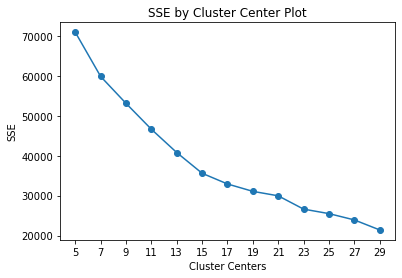

In [21]:
def find_optimal_clusters(data, max_k):
    iters = range(5, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 30)

In [8]:
clusters_new = KMeans(n_clusters=11, random_state=20).fit_predict(text)

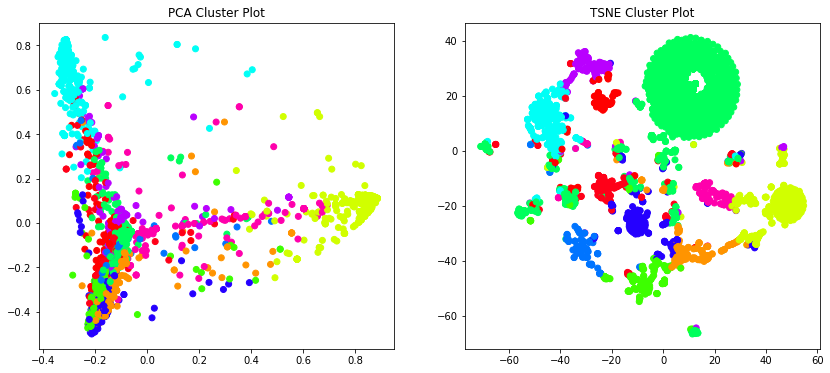

In [25]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=5000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=20).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=5000, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

plot_tsne_pca(text, clusters_new)

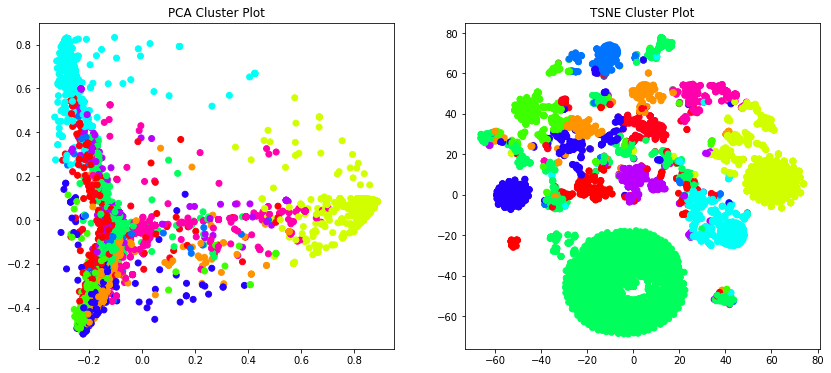

In [33]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=10000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=20).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=10000, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

plot_tsne_pca(text, clusters_new)

In [9]:
df["Topic_cluster"] = clusters_new

In [10]:
df["Topic_cluster"].value_counts()

4     82599
2     19752
5     15243
7     11220
3     10404
10     7722
1      7662
8      7450
9      6978
0      6485
6      6356
Name: Topic_cluster, dtype: int64

In [11]:
df.drop(columns=["index"],inplace=True)
df

,date,language,title,text,text_clean,cluster,topic1,w1,topic2,w2,topic3,w3,Topic_cluster
0,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...,0,1,0.998010,NaN,NaN,NaN,NaN,7
1,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...,0,1,0.998145,NaN,NaN,NaN,NaN,10
2,2022-01-06,english,Watch ‘Chicago P.D.’ Preview Wednesday,Chicago PD 9×11 “Lies” Season 9 Episode 11 Pro...,chicago pd lies season episode pro...,0,6,0.689289,0.0,0.214598,17.0,0.061193,4
3,2022-01-06,english,Trump’s Solution for Chicago Public Schools? K...,Wise of Foolish?\nThe Chicago Tribune article ...,wise of foolish the chicago tribune article t...,0,12,0.457139,1.0,0.322744,6.0,0.075293,4
4,2022-01-06,english,"Family, friends, colleagues gathering today at...",The neighbors near Mashawn Plummer’s Portage P...,the neighbors near mashawn plummer s portage p...,0,6,0.569758,2.0,0.336124,3.0,0.080211,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181866,2022-03-05,english,Chicago girl shot after celebrating 12th birth...,Authorities say a girl who was shot in the hea...,authorities say a girl who was shot in the hea...,0,2,0.898170,0.0,0.013380,1.0,0.010981,4
181867,2022-03-05,english,Loyola Chicago vs. Northern Iowa – MVC Tournam...,"The No. 4 seed Loyola Chicago Ramblers (23-7, ...",the no seed loyola chicago ramblers ...,0,15,0.662747,3.0,0.177199,14.0,0.083335,2
181868,2022-03-05,english,"DraftKings Illinois Promo Code: $1,050 Bonus a...",Remember to check out the DraftKings Illinois ...,remember to check out the draftkings illinois ...,0,10,0.451471,16.0,0.335602,13.0,0.176749,4
181869,2022-03-05,english,"Sidney, Illinois had a median home valuation o...",[BlockShopper.com] .\n|Buyer||Address||Valuati...,buyer address valuation jennifer a ...,0,11,0.924808,18.0,0.033204,12.0,0.028433,8


In [12]:
df.to_pickle("data_with_topic_cluster_v2.pkl")

In [17]:
cnt = df["Topic_cluster"].value_counts()

In [18]:
cnt

4     82599
2     19752
5     15243
7     11220
3     10404
10     7722
1      7662
8      7450
9      6978
0      6485
6      6356
Name: Topic_cluster, dtype: int64

In [21]:
def get_top_keywords(data, clusters, labels, n_terms,cnt):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}; {} articles; keywords({})'.format(i,cnt[i],','.join([labels[t] for t in np.argsort(-r)[:n_terms]])))
        #print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters_new, tfidf.get_feature_names(), 3, cnt)


Cluster 0; 6485 articles; keywords(law,work,insurance)

Cluster 1; 7662 articles; keywords(job,work,business)

Cluster 2; 19752 articles; keywords(game,sports,work)

Cluster 3; 10404 articles; keywords(business,work,food)

Cluster 4; 82599 articles; keywords(tax,alcohol,cost)

Cluster 5; 15243 articles; keywords(police,crime,court)

Cluster 6; 6356 articles; keywords(food,business,work)

Cluster 7; 11220 articles; keywords(work,job,education)

Cluster 8; 7450 articles; keywords(court,law,child)

Cluster 9; 6978 articles; keywords(sports,game,work)

Cluster 10; 7722 articles; keywords(community,work,business)


## NLI

In [22]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import string

In [21]:
#Verify we got CPU + GPU or only CPU
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [23]:
import ktrain

ModuleNotFoundError: No module named 'ktrain'

In [15]:
topics

,0,1,2,3,4,5,6,7,8,9
0,lawyer,accident,get,insurance,truck,injury,know,well,law,time
1,school,say,student,district,teacher,covid,mask,union,announce,class
2,say,police,year,officer,man,shoot,old,charge,news,report
3,game,bull,team,point,season,first,play,win,second,get
4,roof,roofing,also,well,repair,cover,make,need,get,company
5,service,work,community,business,include,experience,company,provide,year,program
6,say,go,get,see,time,make,show,season,year,know
7,say,russian,ukrainian,year,country,also,company,use,energy,people
8,share,company,stock,quarter,rating,work,tool,price,own,buy
9,document,social,_,important,ad,color,text,margin,icon,function


In [ ]:
labels = ["politics","education","crime","sports","quality of life","business","community","housing","employment","public policy","tax","covid","restaurant","child"]

In [17]:
df

,date,language,title,text,text_clean,Topic_cluster
0,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...,1
1,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...,1
2,2022-01-06,english,Watch ‘Chicago P.D.’ Preview Wednesday,Chicago PD 9×11 “Lies” Season 9 Episode 11 Pro...,chicago pd lies season episode pro...,8
3,2022-01-06,english,Trump’s Solution for Chicago Public Schools? K...,Wise of Foolish?\nThe Chicago Tribune article ...,wise of foolish the chicago tribune article t...,4
4,2022-01-06,english,"Family, friends, colleagues gathering today at...",The neighbors near Mashawn Plummer’s Portage P...,the neighbors near mashawn plummer s portage p...,2
...,...,...,...,...,...,...
200114,2022-03-05,english,Chicago girl shot after celebrating 12th birth...,Authorities say a girl who was shot in the hea...,authorities say a girl who was shot in the hea...,8
200115,2022-03-05,english,Loyola Chicago vs. Northern Iowa – MVC Tournam...,"The No. 4 seed Loyola Chicago Ramblers (23-7, ...",the no seed loyola chicago ramblers ...,10
200116,2022-03-05,english,"DraftKings Illinois Promo Code: $1,050 Bonus a...",Remember to check out the DraftKings Illinois ...,remember to check out the draftkings illinois ...,2
200117,2022-03-05,english,"Sidney, Illinois had a median home valuation o...",[BlockShopper.com] .\n|Buyer||Address||Valuati...,buyer address valuation jennifer a ...,8


In [19]:
sample = df.iloc[0:100,:]
texts = sample['text_clean'].tolist()

In [ ]:
%time 
predictions = zsl.predict(texts, labels=labels, include_labels=False, batch_size=1)